In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns

df = pd.read_excel('R:\\Bunmi\\SHG_LIF_Files\\MaxProjFiberAnalysis1.xlsx', sheet_name='1204_%Diff1')
df.head()

,Sample,Fiber,Area,Length,Width,%Diff_Area,%Diff_Length,%Diff_Width
0,Trt_2min,1,28704.177,82.817,38.746,20.451635,7.038922,17.189046
1,Trt_2min,2,11550.604,52.322,-0.186,15.641210,7.100169,-0.090017
2,Trt_20min,1,4794.386,-39.258,-10.747,3.415985,-3.336682,-4.767735
3,Trt_20min,2,6280.038,-0.999,-18.926,8.504092,-0.135566,-9.159500
4,Trt_40min,1,12738.241,28.749,2.545,9.075956,2.443483,1.129049


In [37]:
df[(df['Exp'] == '10-02')]['trt'].unique()

array(['Trt', 'Ctrl'], dtype=object)

In [3]:
df1 = df.copy()
df1[['%Diff_Area',	'%Diff_Length',	'%Diff_Width']] = df1[['%Diff_Area',	'%Diff_Length',	'%Diff_Width']].abs()

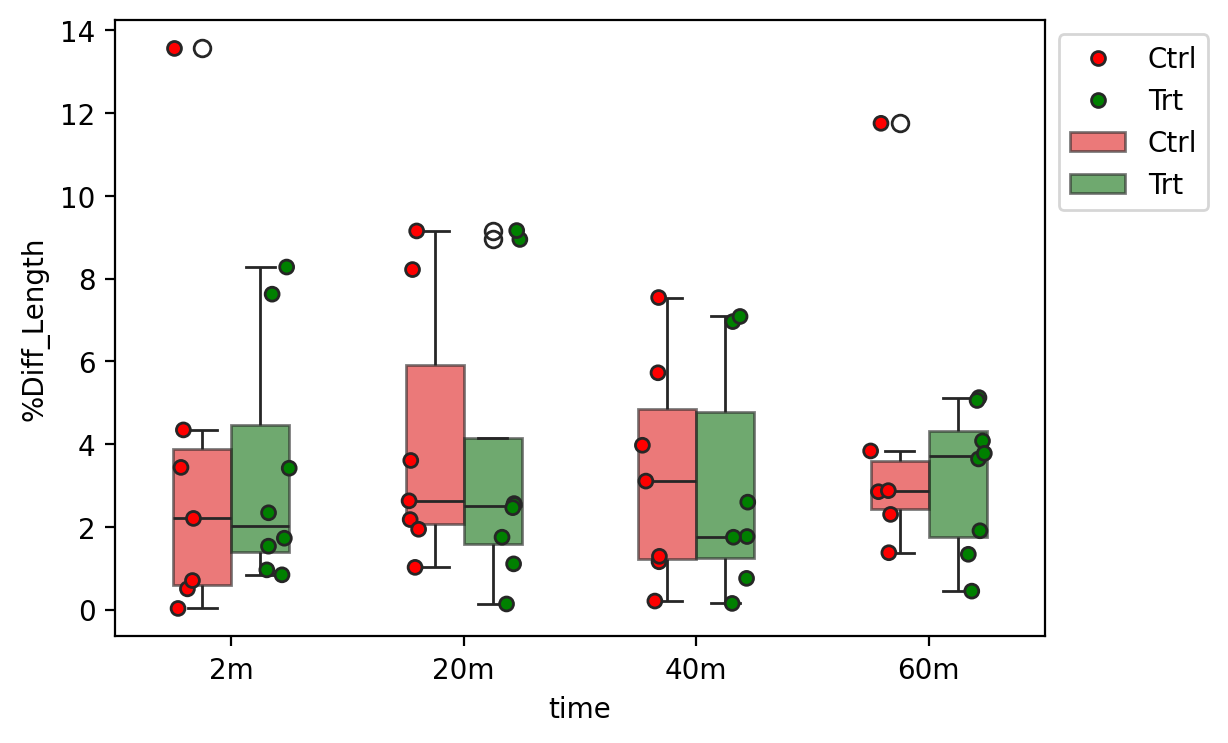

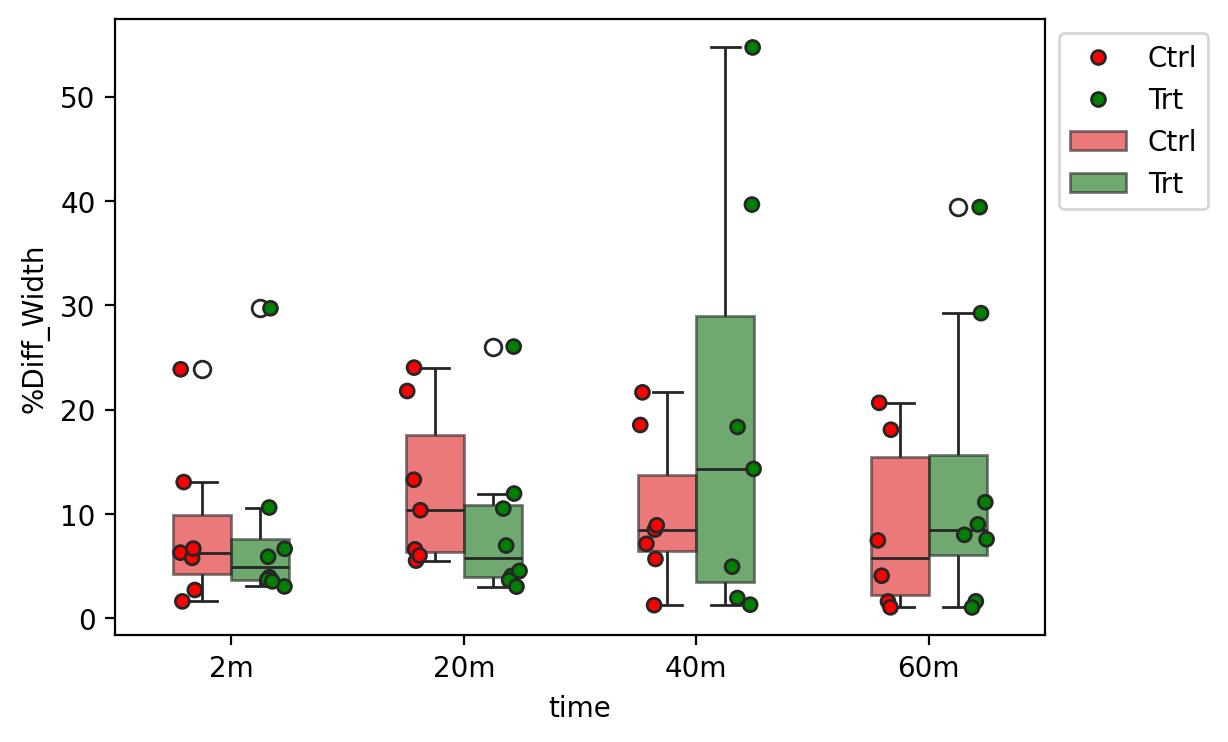

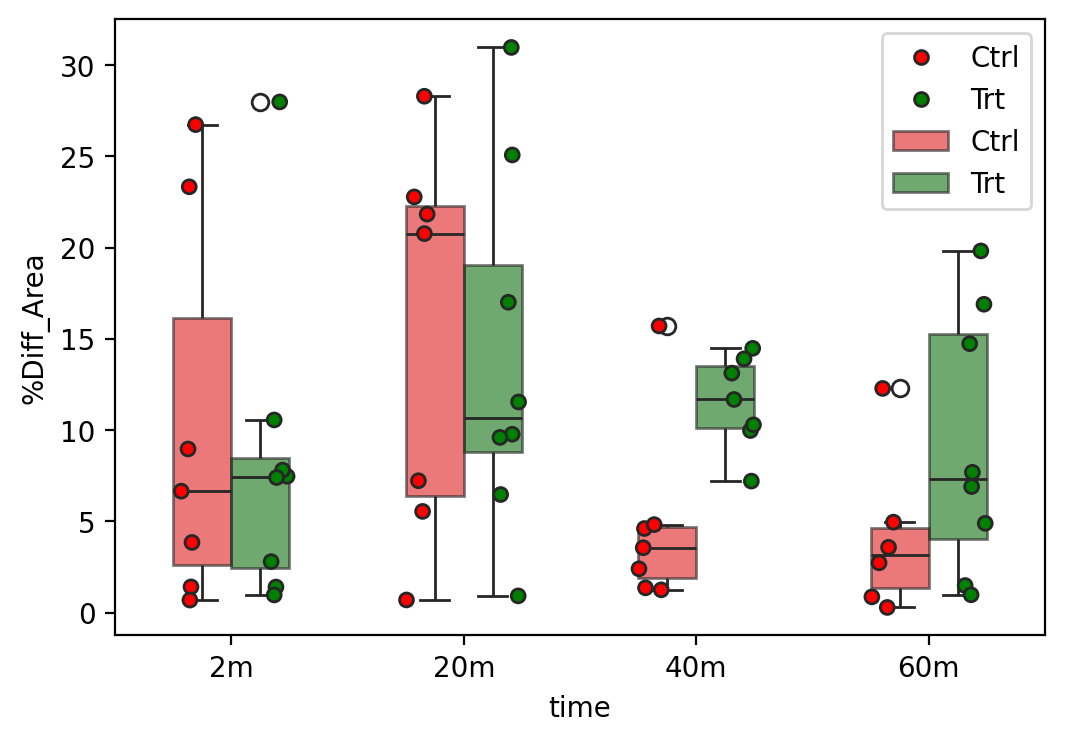

In [6]:
for col in ['%Diff_Length', '%Diff_Width', '%Diff_Area']:
    plt.figure(figsize = (6, 4), dpi = 200);
    sns.stripplot(
        data = df1, #[(df['Exp'] == '09-30') ],
        x = 'time',
        y = col,
        hue = 'trt',
        hue_order = ['Ctrl', 'Trt'],
         order = ['2m', '20m', '40m', '60m'],
        #errorbar='se',
        #alpha = .6,
        palette = ['red', 'green'],# 'blue',
        dodge = .4,
        linewidth = 1,
        edgecolor = 'auto'
    );
    sns.boxplot(
        data = df1, #[(df['Exp'] == '09-30') ],
        x = 'time',
        y = col,
        hue = 'trt',
        hue_order = ['Ctrl', 'Trt'],
        order = ['2m', '20m', '40m', '60m'],
        width = .5,
    # alpha = .6,
    #dodge = .02,
    boxprops=dict(alpha=.6),#,lineArea=1, facecolor='w', edgecolor='k', 
    palette = ['red', 'green'], #'blue'
    );
    plt.legend(bbox_to_anchor = (1, 1));


In [66]:
df1.head()

,Exp,trt,time,Samp,Area_diff,Length_diff,Width_diff,%Diff_Area,%Diff_Length,%Diff_Width
0,07-22,Trt,2m,2mins,18103.564,51.666,8.592,7.467701,2.339664,3.946226
1,07-22,Trt,2m,2mins1,11609.794,45.413,-28.708,2.791211,1.532407,10.625155
2,07-22,Trt,20m,20mins,37238.413,53.520,14.185,17.004377,2.561866,6.979468
3,07-22,Trt,20m,20mins1,62992.387,183.568,43.063,25.075370,8.945168,26.058043
4,07-22,Trt,40m,40mins1,29164.435,-16.288,108.818,9.974636,0.754544,54.745686


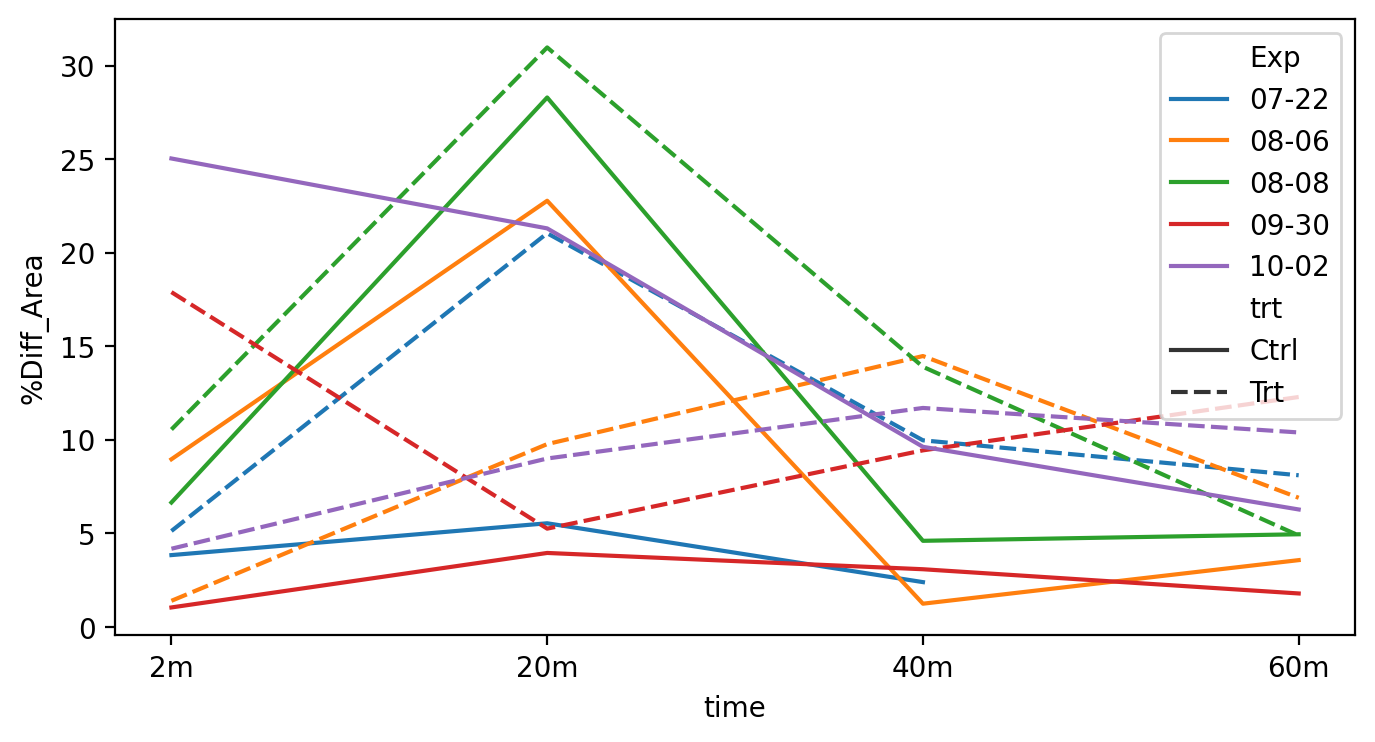

In [7]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.lineplot(
    df1,
    x = 'time',
    y = '%Diff_Area',
    hue = 'Exp',
   estimator = 'mean',
    style = 'trt',
    errorbar=None,
    style_order = ['Ctrl', 'Trt']
);

In [88]:
df1.groupby(['time', 'trt']).std(numeric_only=True).round(2)

Area_diff  Length_diff  Width_diff  %Diff_Area  %Diff_Length  \
time trt                                                                  
20m  Ctrl   42262.15        84.24       33.88       10.58          3.23   
     Trt    29478.85        97.38       15.69        9.93          3.48   
2m   Ctrl   25607.89        64.17       25.56       10.55          4.70   
     Trt    14838.98        97.14       24.09        8.67          2.96   
40m  Ctrl   10749.47        60.91       29.38        5.01          2.66   
     Trt    28848.72        55.62       40.83        2.57          2.85   
60m  Ctrl   10981.78        67.79       27.83        4.36          3.80   
     Trt    18845.96        63.75       27.87        7.13          1.74   

           %Diff_Width  
time trt                
20m  Ctrl         7.64  
     Trt          7.69  
2m   Ctrl         7.68  
     Trt          8.97  
40m  Ctrl         7.25  
     Trt         20.53  
60m  Ctrl         8.52  
     Trt         13.67

<Axes: xlabel='%Diff_Area', ylabel='Count'>

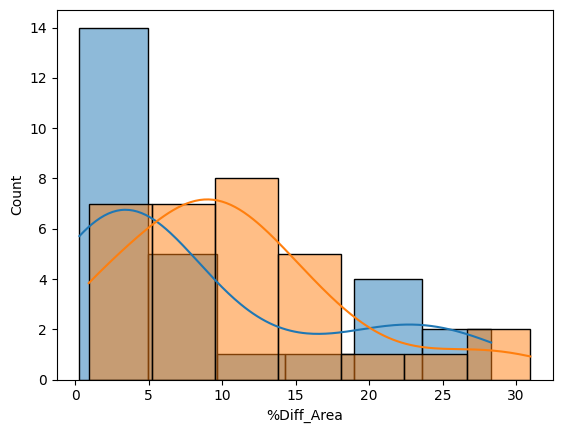

In [59]:
sns.histplot(df1[df1['trt'] == 'Ctrl']["%Diff_Area"], kde = True)
sns.histplot(df1[df1['trt'] == 'Trt']["%Diff_Area"], kde = True)

In [27]:
df1['Exp'].unique()

array(['07-22', '08-06', '08-08', '09-30', '10-02'], dtype=object)

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2050890355.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2050890355.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2050890355.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2050890355.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2050890355.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2050890355.py:16: UserWarning: The palet

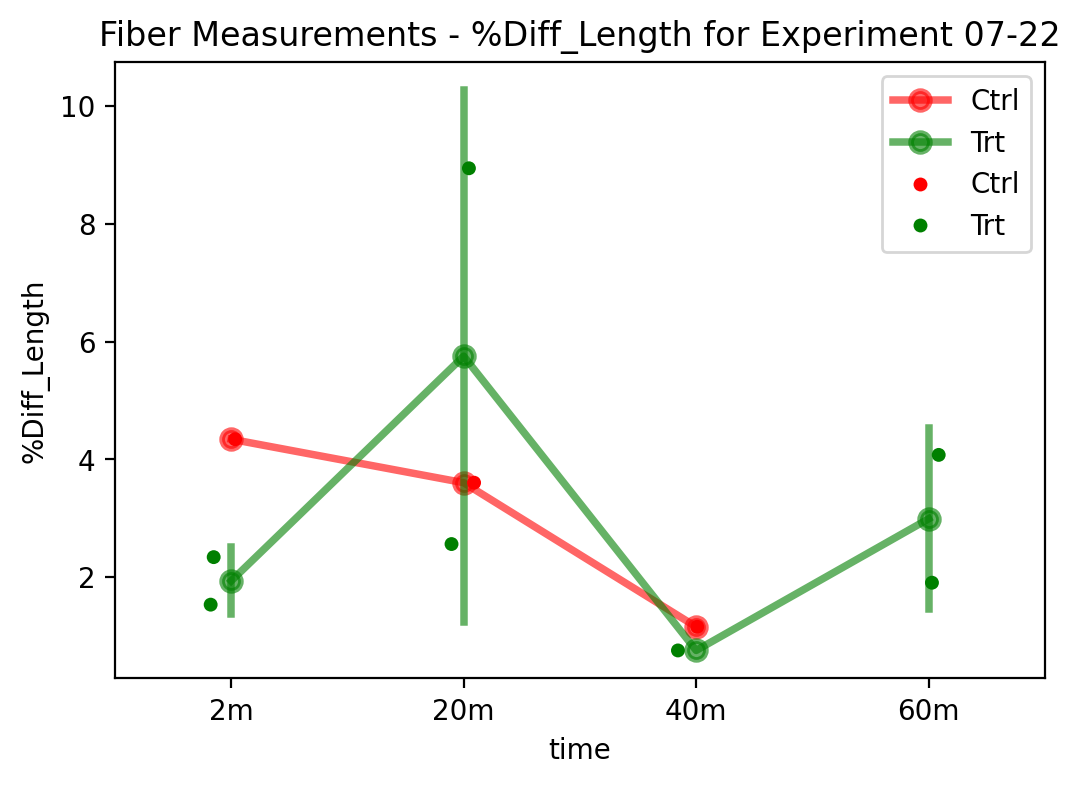

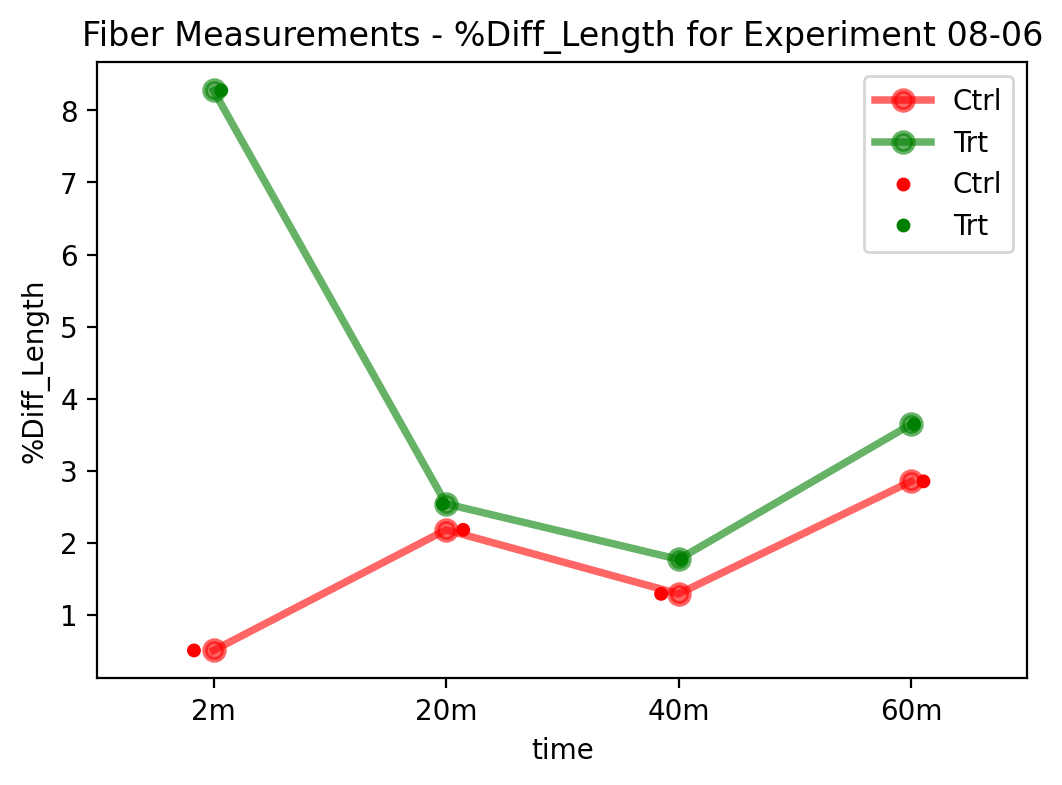

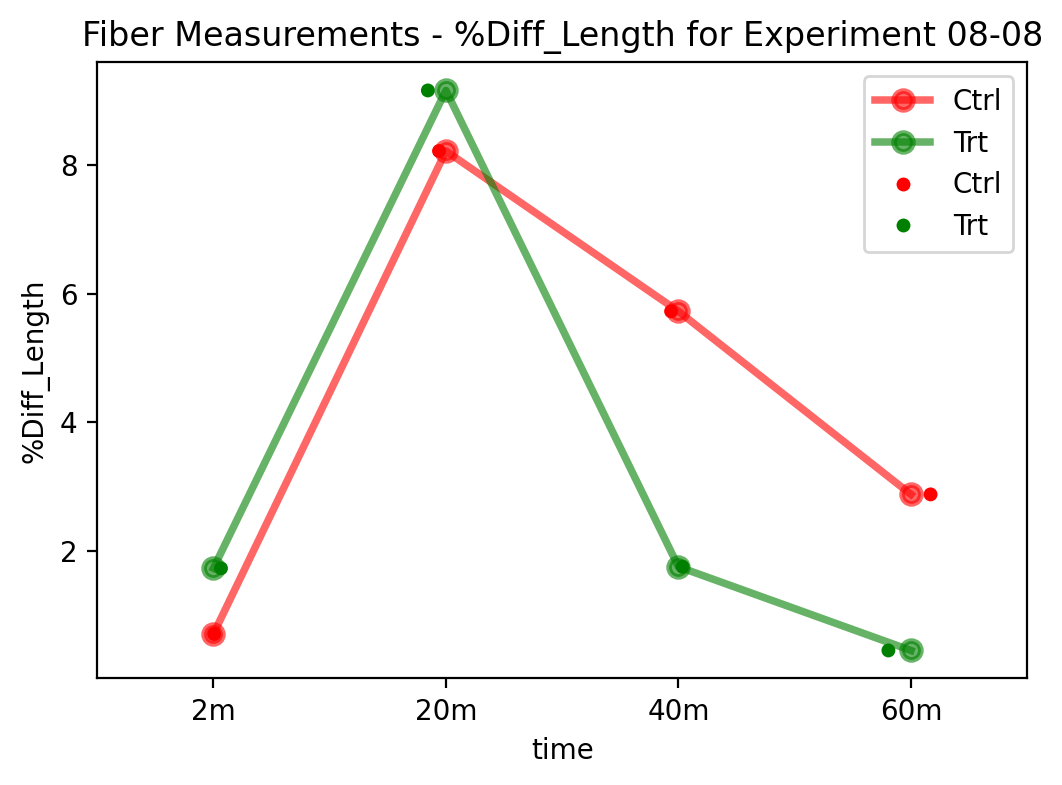

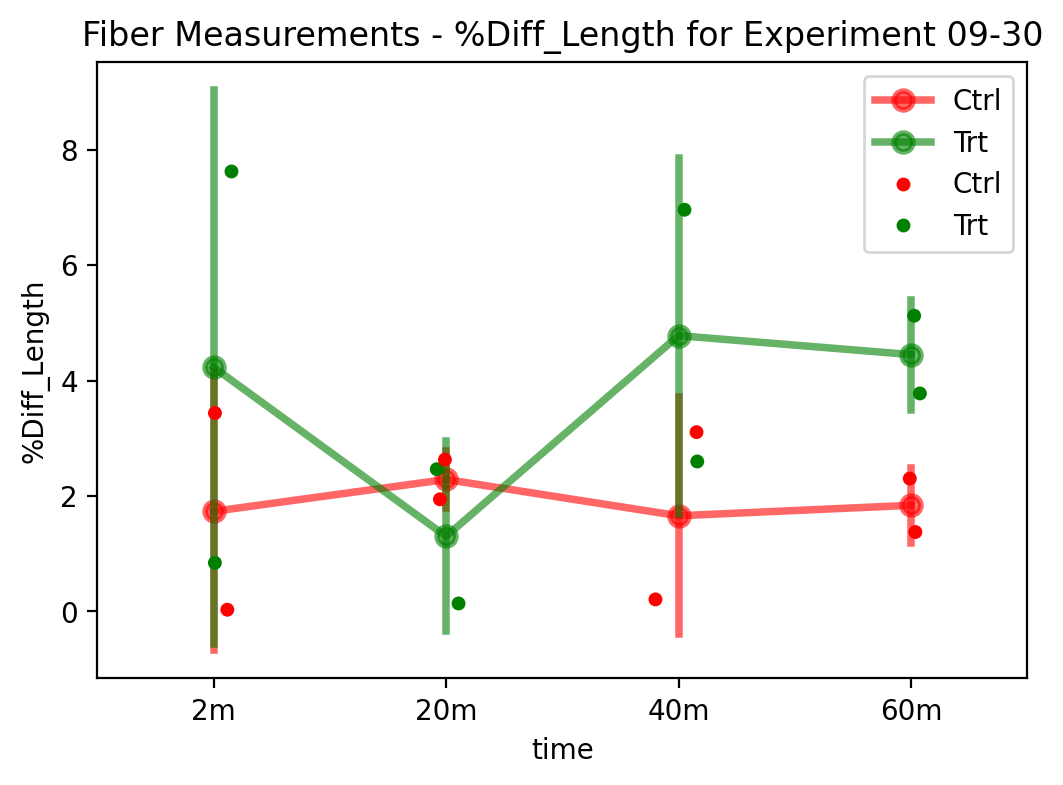

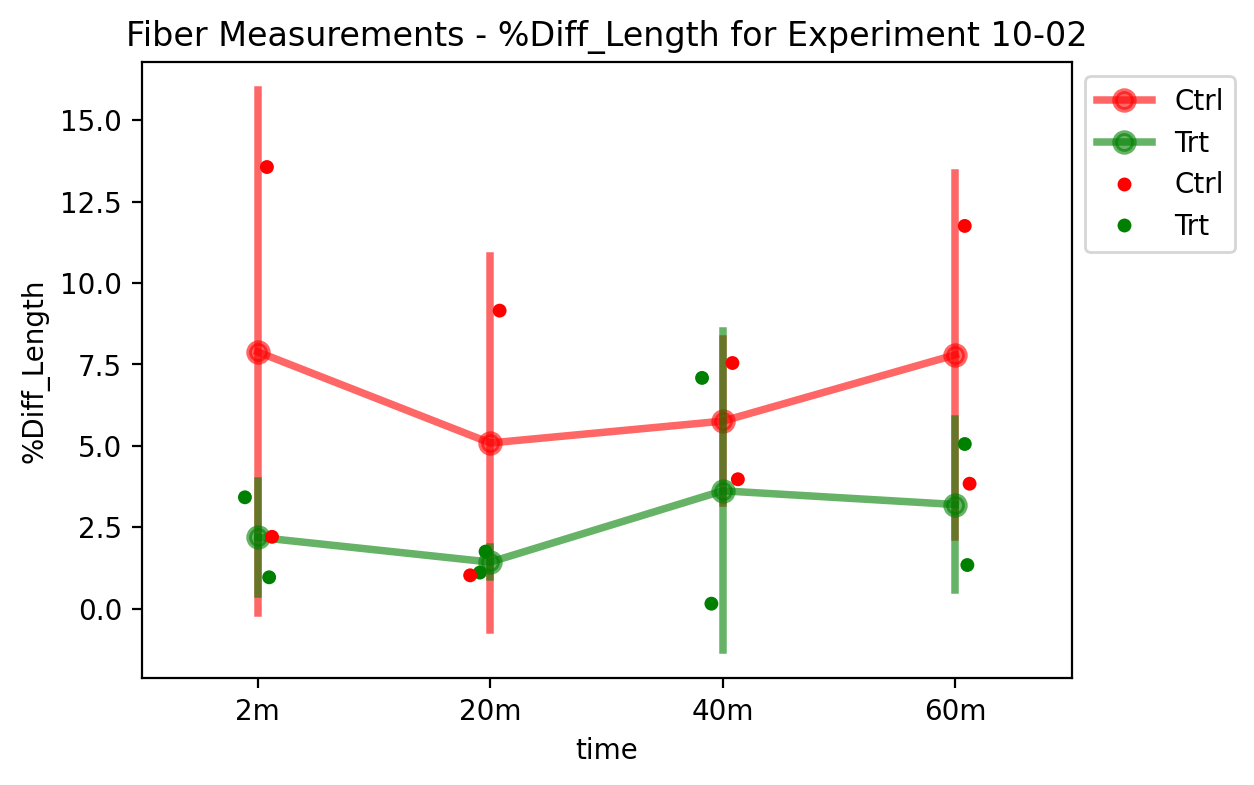

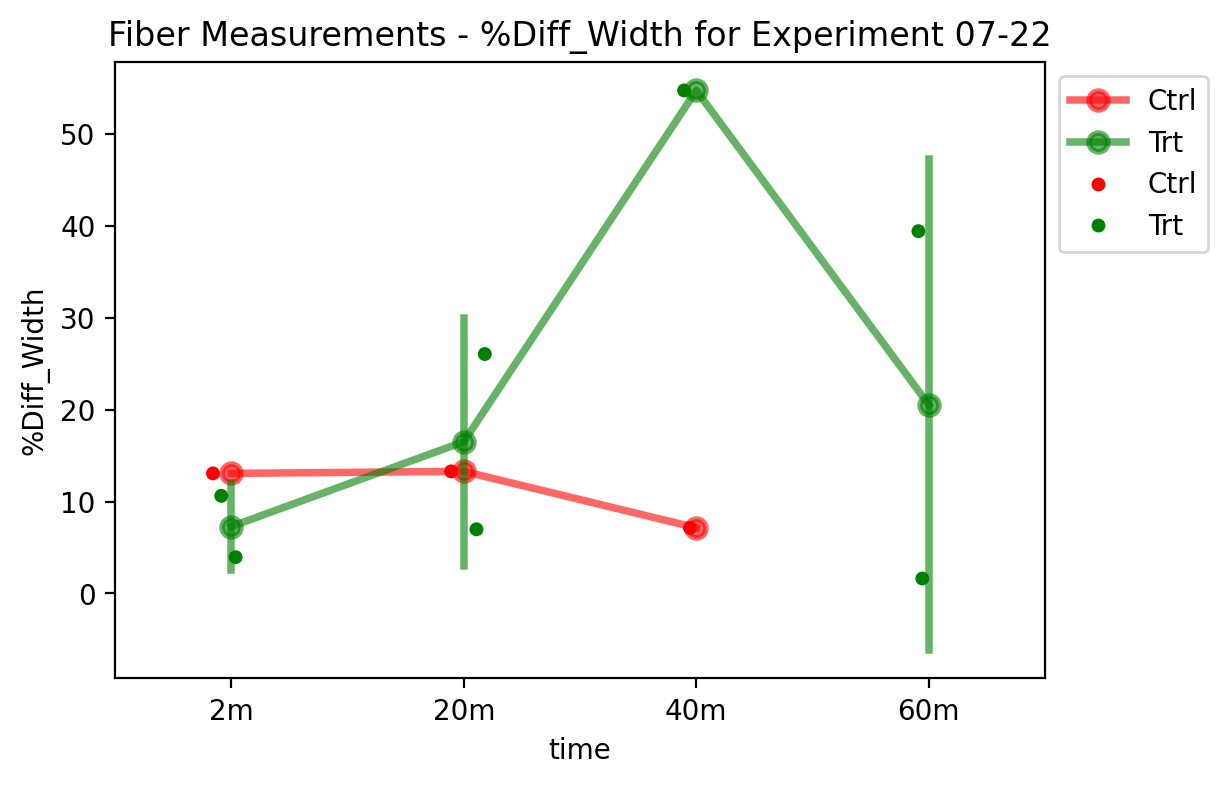

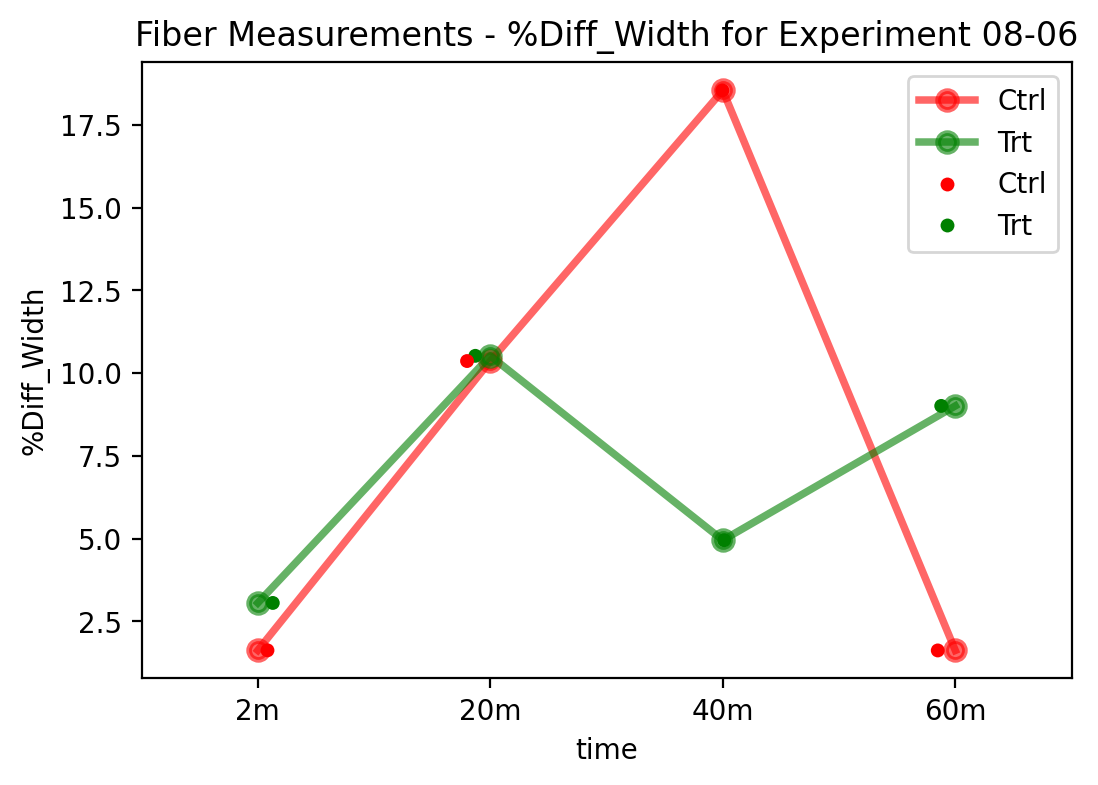

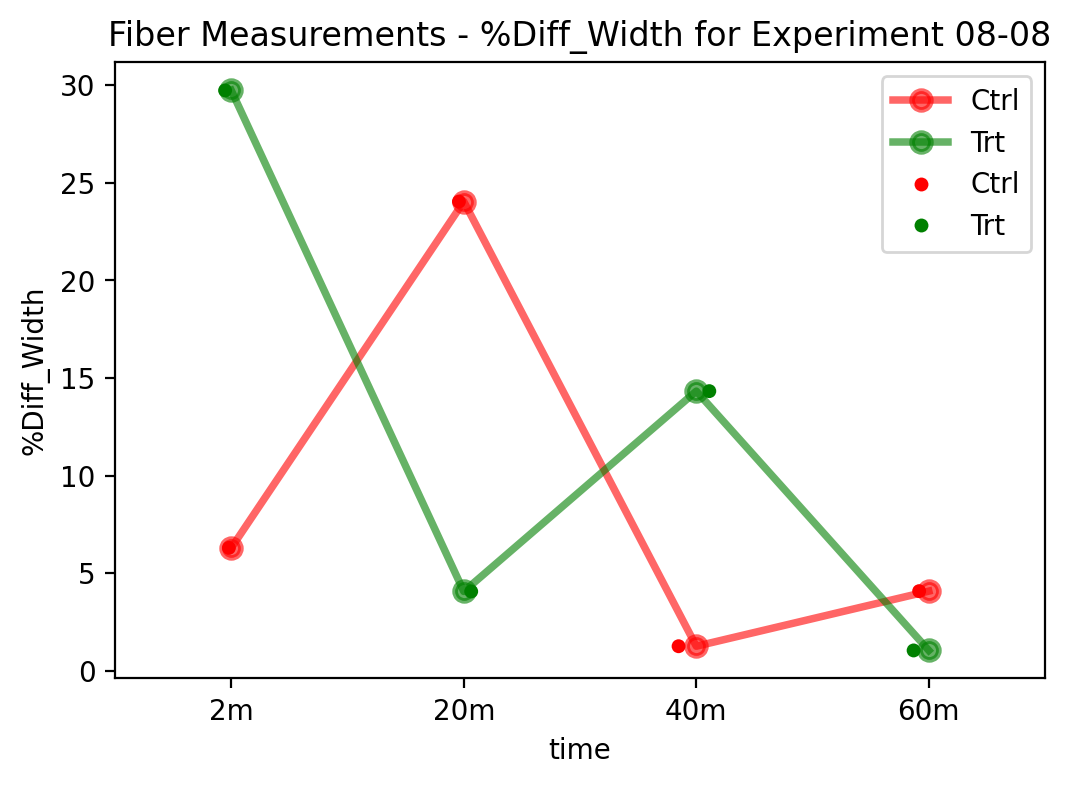

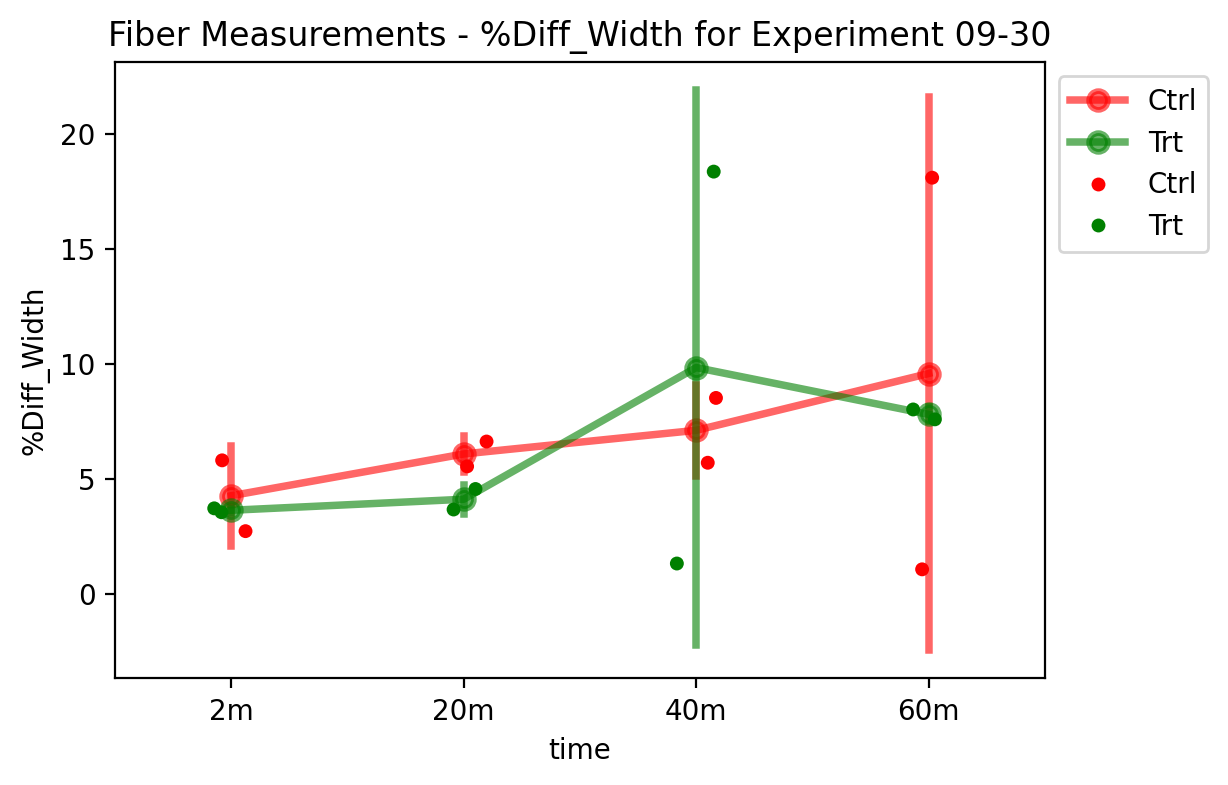

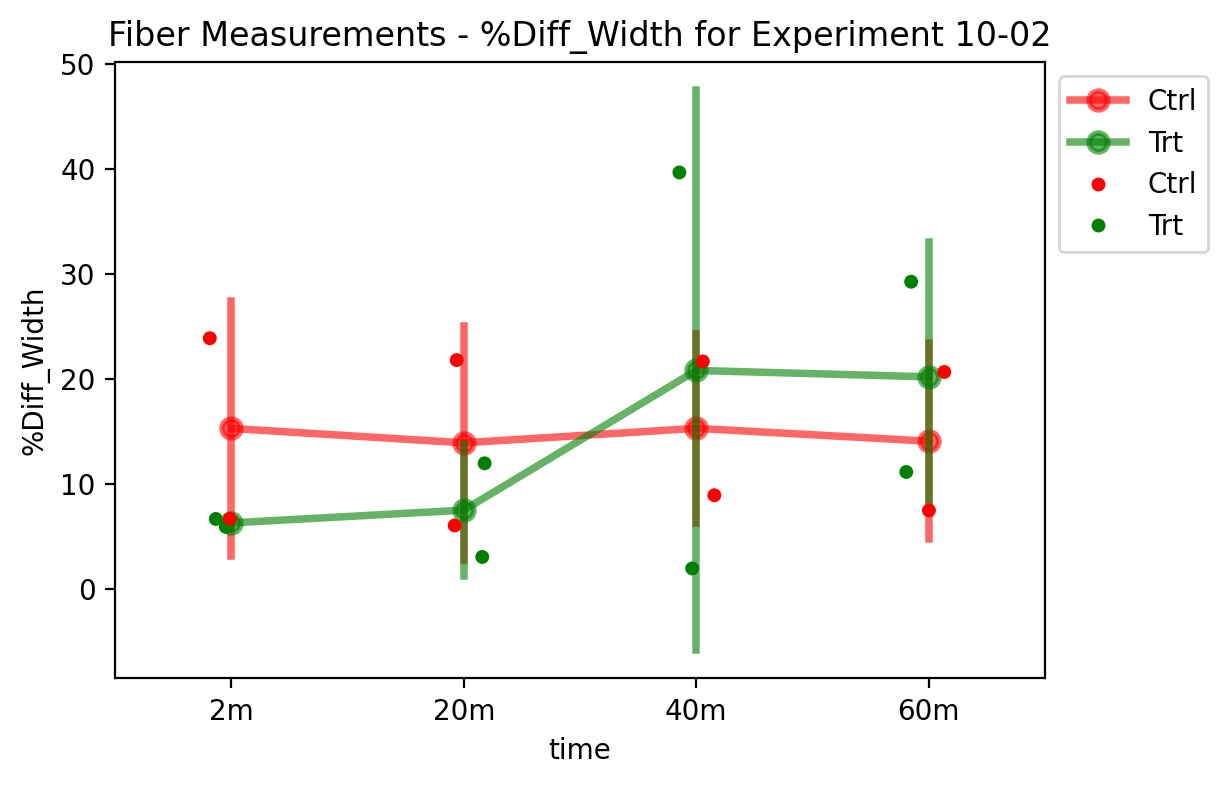

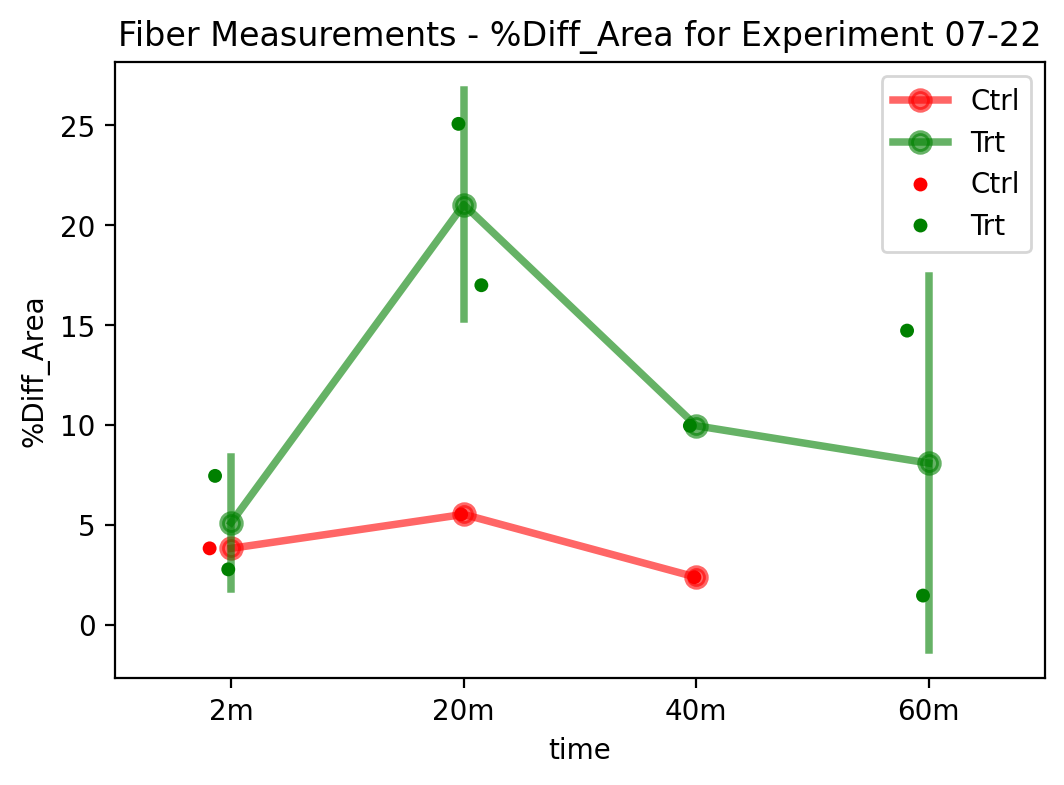

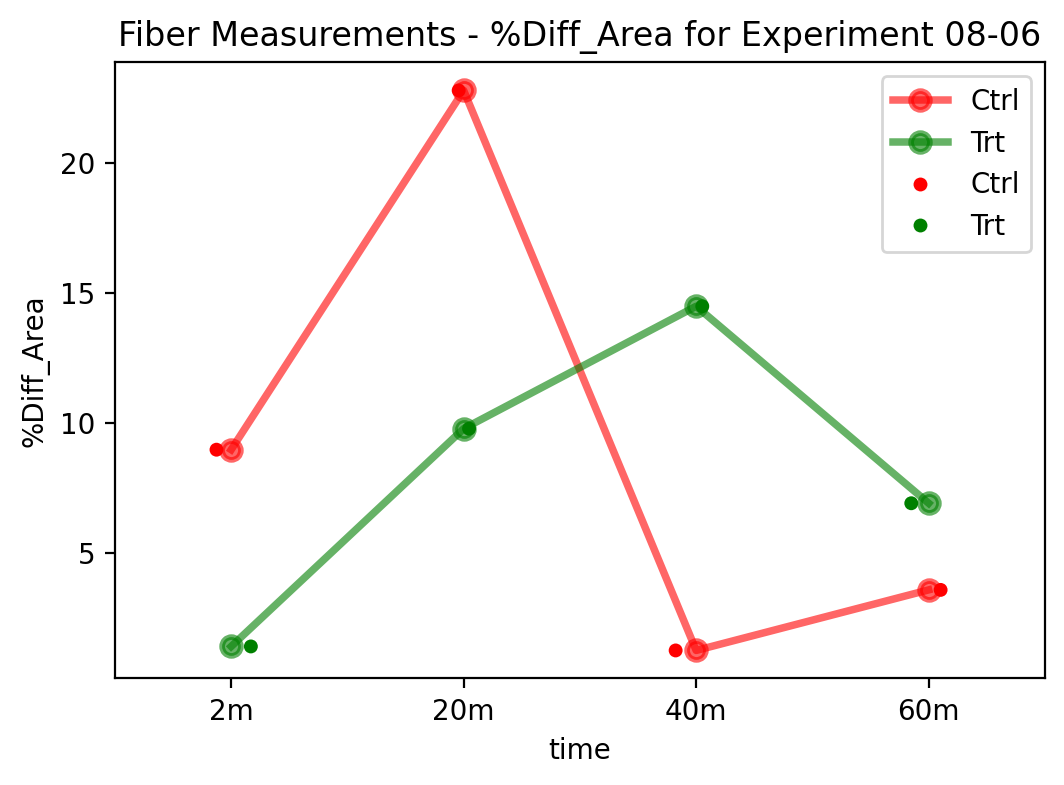

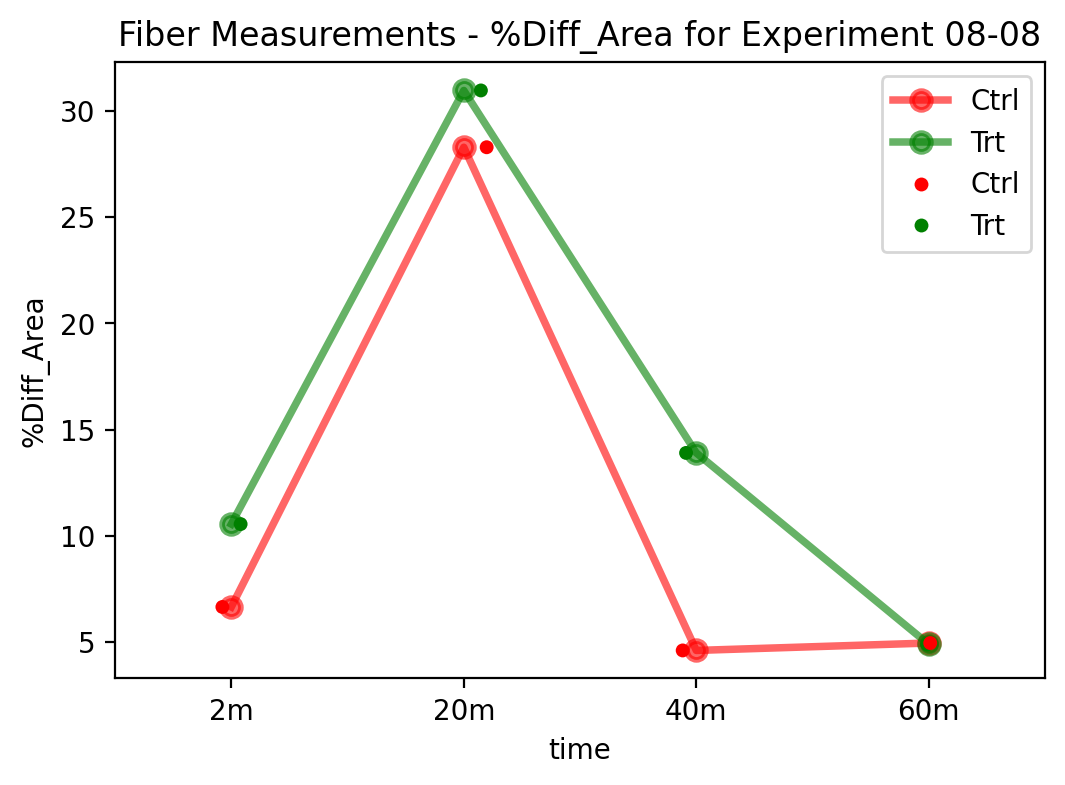

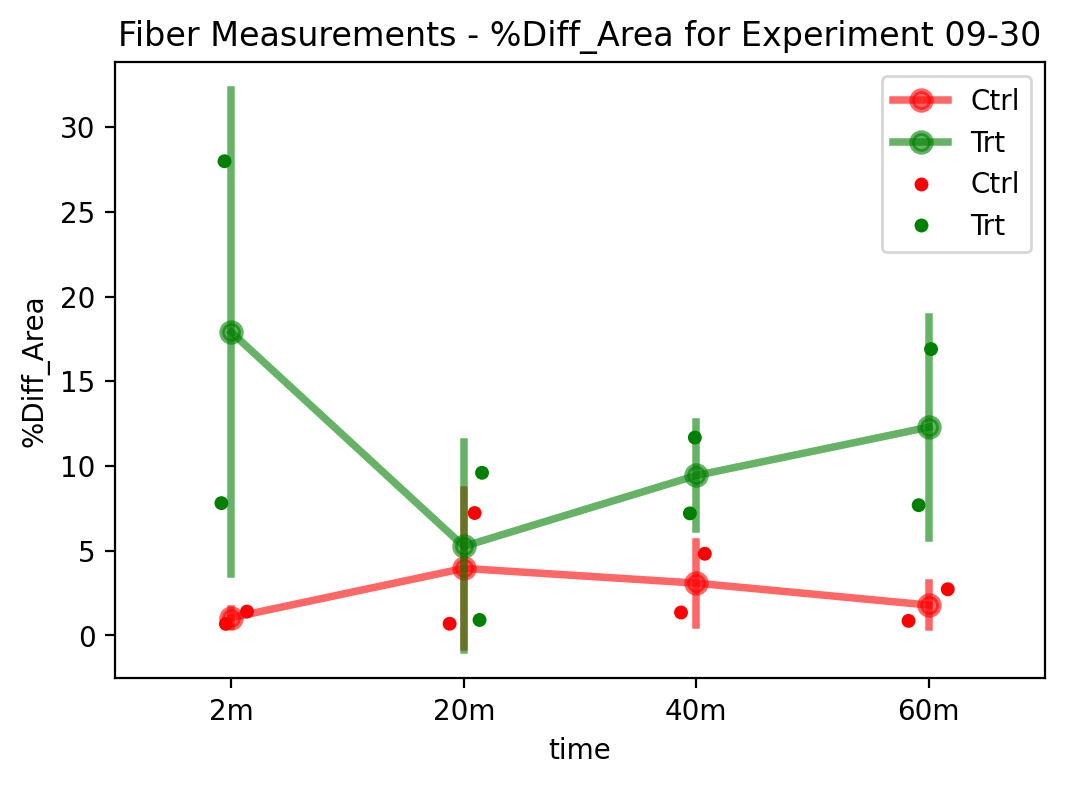

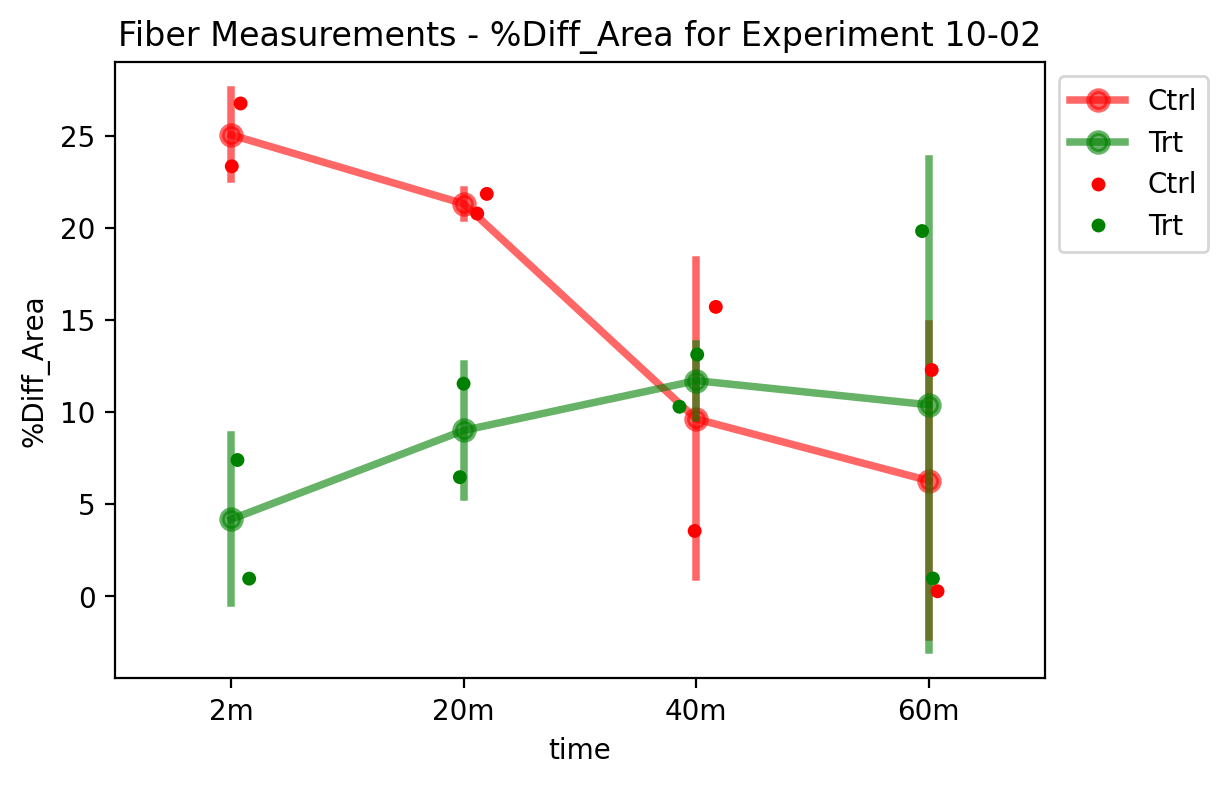

In [52]:
for col in ['%Diff_Length', '%Diff_Width', '%Diff_Area']:
    for dt in ['07-22', '08-06', '08-08', '09-30',  '10-02']:
        plt.figure(figsize = (6, 4), dpi = 200);
        sns.pointplot(
            data = df1[(df1['Exp'] == dt)],
            x = 'time',
            y = col,
            hue = 'trt',
            hue_order = ['Ctrl', 'Trt'],#'CtrlRF', 
        # order = ['0m', '2m', '20m', '40m', '60m'],
            errorbar='sd',
            alpha = .6,
            palette = ['red', 'green', 'blue'],
        estimator = 'mean',
        );
        sns.stripplot(
            data = df1[(df1['Exp'] == dt)],
            x = 'time',
            y = col,
            hue = 'trt',
            hue_order = ['Ctrl', 'Trt'],
            #order = ['0m', '2m', '20m', '40m', '60m'],
        # alpha = .6,
        #dodge = .02,
        #boxprops=dict(alpha=.6),#,lineWidth=1, facecolor='w', edgecolor='k', 
        palette = ['red', 'green', 'blue'],
        #errorbar='sd'
        );
        plt.legend(bbox_to_anchor = (1, 1));
        plt.title(f'Fiber Measurements - {col} for Experiment {dt}')

In [36]:
df

,Sample,Fiber,Area,Length,Width,%Diff_Area,%Diff_Length,%Diff_Width
0,Trt_2min,1,28704.177,82.817,38.746,20.451635,7.038922,17.189046
1,Trt_2min,2,11550.604,52.322,-0.186,15.641210,7.100169,-0.090017
2,Trt_20min,1,4794.386,-39.258,-10.747,3.415985,-3.336682,-4.767735
3,Trt_20min,2,6280.038,-0.999,-18.926,8.504092,-0.135566,-9.159500
4,Trt_40min,1,12738.241,28.749,2.545,9.075956,2.443483,1.129049
5,Trt_40min,2,9178.548,22.026,-13.229,12.429099,2.988959,-6.402358
6,Trt_60min,1,12595.468,56.296,-5.987,8.974231,4.784804,-2.656037
7,Trt_60min,2,8550.343,10.828,-14.439,11.578417,1.469375,-6.987954
8,Ctrl_2min,1,1270.687,20.244,42.930,1.532369,2.261915,29.066658
9,Ctrl_20min,1,5245.832,0.463,37.240,6.326145,0.051732,25.214124


In [37]:
tt = df['Sample'].str.split('_', expand = True).rename(columns = {0: 'trt', 1:'time'})
dff = pd.concat([tt, df], axis=1)

In [38]:
dff

,trt,time,Sample,Fiber,Area,Length,Width,%Diff_Area,%Diff_Length,%Diff_Width
0,Trt,2min,Trt_2min,1,28704.177,82.817,38.746,20.451635,7.038922,17.189046
1,Trt,2min,Trt_2min,2,11550.604,52.322,-0.186,15.641210,7.100169,-0.090017
2,Trt,20min,Trt_20min,1,4794.386,-39.258,-10.747,3.415985,-3.336682,-4.767735
3,Trt,20min,Trt_20min,2,6280.038,-0.999,-18.926,8.504092,-0.135566,-9.159500
4,Trt,40min,Trt_40min,1,12738.241,28.749,2.545,9.075956,2.443483,1.129049
5,Trt,40min,Trt_40min,2,9178.548,22.026,-13.229,12.429099,2.988959,-6.402358
6,Trt,60min,Trt_60min,1,12595.468,56.296,-5.987,8.974231,4.784804,-2.656037
7,Trt,60min,Trt_60min,2,8550.343,10.828,-14.439,11.578417,1.469375,-6.987954
8,Ctrl,2min,Ctrl_2min,1,1270.687,20.244,42.930,1.532369,2.261915,29.066658
9,Ctrl,20min,Ctrl_20min,1,5245.832,0.463,37.240,6.326145,0.051732,25.214124


<Axes: xlabel='time', ylabel='%Diff_Area'>

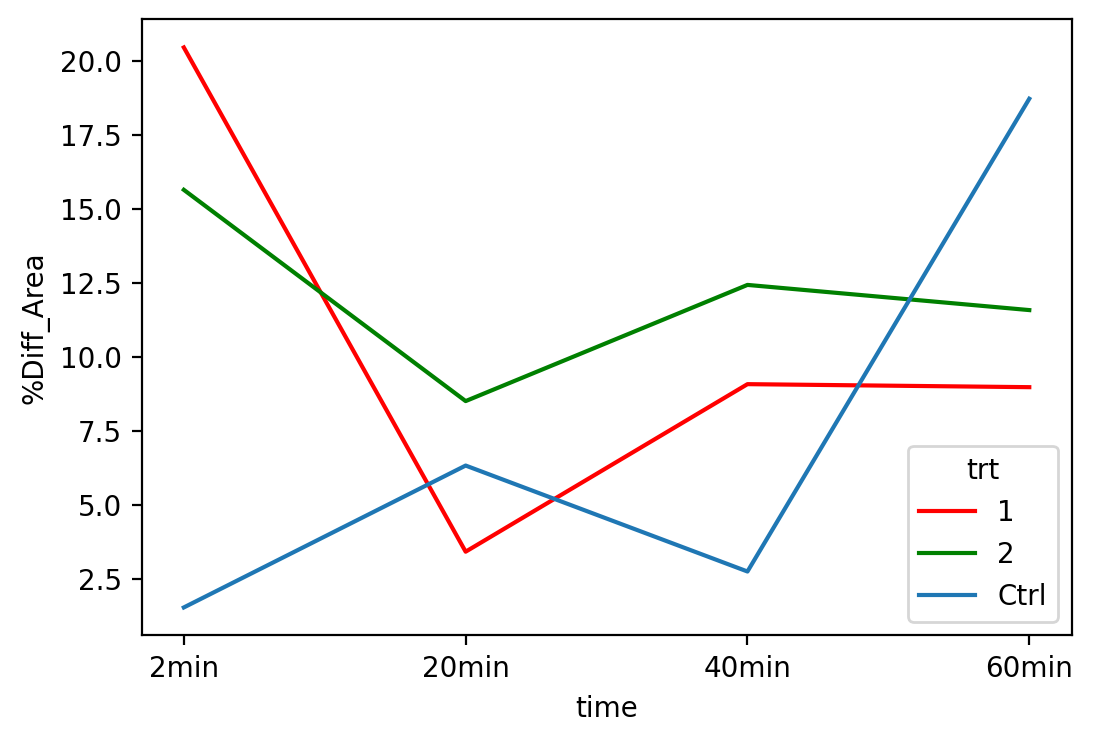

In [41]:
plt.figure(figsize = (6, 4), dpi = 200);
sns.lineplot(
    x = 'time',
    y = '%Diff_Area',
    data = dff[dff['trt'].isin(['Trt'])],
   # color = 'red',
    #estimator= 'median'
    hue = 'Fiber',
    palette = ['red', 'green']
)
sns.lineplot(
    x = 'time',
    y = '%Diff_Area',
    data = dff[dff['trt'].isin(['Ctrl'])],
    hue = 'trt',
    color = 'blue'
)